In [ ]:
!pip install transformers
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 402.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.16.0
    Uninstalling torchtext-0.16.0:
      Successfully uninstalled torchtext-0.16.0


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [ ]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # Progress Bar
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import warnings
from transformers import logging as hf_logging
hf_logging.set_verbosity_error() # Hidding Huggingface Warnings
warnings.filterwarnings("ignore")

In [ ]:
# load packages
import torch
import torch.nn as nn
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from transformers import get_linear_schedule_with_warmup, AdamW
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
import time, datetime, random, re
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from torch.cuda.amp import autocast, GradScaler

SEED = 15
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [ ]:
torch.backends.cudnn.deterministic = True
torch.cuda.amp.autocast(enabled=True)

In [ ]:
device = torch.device("cuda")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/updatedcyberbulling-bangla-dataset-same-as-bangla-online-comments-dataset.xlsx')
raw_data = df.copy()
raw_data.head()

,comment,Category,Gender,comment react number,label,binary label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,Politician,male,1.0,religious,1
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,0
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,0
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,Politician,Male,1.0,not bully,0
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,Politician,Male,3.0,troll,1


In [ ]:
#Dropping unnecessary columns
df = raw_data.drop(['Category','Gender','comment react number','binary label'], axis=1)
display(df)

,comment,label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll
...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully


In [ ]:
# Rename the column
df.rename(columns={'comment': 'Text'}, inplace=True)

In [ ]:
# Rename the column
df.rename(columns={'label': 'Result'}, inplace=True)

In [ ]:
df.head()

,Text,Result
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(20)

,Text,Result
14322,আবালের মত কথা বলিস না।।,troll
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,threat
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",religious
39917,নুনুবেলের তামাসা,sexual
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",not bully
1676,একেই বলে ঠেলার নাম বাবাজি,troll
3509,মায়াবী হাসি❤❤❤,not bully
6496,স্যার Do something for Rongpur.,not bully
9471,হিরু আলম এই দেশে একজন ইস্টার। তারছবির গান গুলো...,not bully
32699,"খাংকি মাগী তুই কোন মুখে বিচারের কথা বলস,,,,তুই...",sexual


In [ ]:
def sentiment2label(sentiment):
    if sentiment == "not bully":
        return "not bully"
    else :
        return "bully"

df['Result'] = df['Result'].apply(sentiment2label)

In [ ]:
df.head()

,Text,Result
14322,আবালের মত কথা বলিস না।।,bully
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,bully
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",bully
39917,নুনুবেলের তামাসা,bully
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",not bully


In [ ]:
df_new=pd.read_csv('/content/drive/MyDrive/translation.csv')
df_new

,Text,Result
0,ড্রেকের মন ঠিক করতে হবে যে সে র্যাপার না কুত্তা?,1
1,রেডমন্ড গ্রিন কুত্তার বাচ্চা,1
2,এক দিন আগে এটা ফেলে দিন নিগ্রোদের এটা শোনা দর...,1
3,নির্বোধ গর্দভ গর্দভ,1
4,ঈগল হচ্ছে যৌনসঙ্গম বিড়াল।,1
...,...,...
9995,যদি তুই কুত্তার বাচ্চা হয়ে যাস......তাহলে আম...,1
9996,বোবা কুত্তা,1
9997,আমার হোপ পর্ব শেষ,1
9998,যে তোমাকে পছন্দ করে না তার কাছে তুমি সবসময় ক...,1


In [ ]:
def sentiment2label(sentiment):
    if sentiment == 0:
        return "not bully"
    else :
        return "bully"

df_new['Result'] = df_new['Result'].apply(sentiment2label)

In [ ]:
df2 = pd.concat([df, df_new], axis=0)
df2

,Text,Result
14322,আবালের মত কথা বলিস না।।,bully
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,bully
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",bully
39917,নুনুবেলের তামাসা,bully
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",not bully
...,...,...
9995,যদি তুই কুত্তার বাচ্চা হয়ে যাস......তাহলে আম...,bully
9996,বোবা কুত্তা,bully
9997,আমার হোপ পর্ব শেষ,bully
9998,যে তোমাকে পছন্দ করে না তার কাছে তুমি সবসময় ক...,bully


In [ ]:
df = None
df = df2
df

,Text,Result
14322,আবালের মত কথা বলিস না।।,bully
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,bully
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",bully
39917,নুনুবেলের তামাসা,bully
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",not bully
...,...,...
9995,যদি তুই কুত্তার বাচ্চা হয়ে যাস......তাহলে আম...,bully
9996,বোবা কুত্তা,bully
9997,আমার হোপ পর্ব শেষ,bully
9998,যে তোমাকে পছন্দ করে না তার কাছে তুমি সবসময় ক...,bully


In [ ]:
df['Result'].value_counts()

bully        38661
not bully    15340
Name: Result, dtype: int64

In [ ]:
#Dropping null values
df.dropna(inplace=True)
df.shape

(54001, 2)

In [ ]:
def sentiment2label(sentiment):
    if sentiment == "not bully":
        return 0
    else :
        return 1

df['Result'] = df['Result'].apply(sentiment2label)

In [ ]:
# Function to remove symbols using string operations
def remove_symbols(text):
    # Define a string containing symbols to remove
    symbols = '''!"[\\]^_`{|}~→'''
    return ''.join(char for char in text if char not in symbols)

# Apply the function to the 'text' column
df['Text'] = df['Text'].apply(remove_symbols)

In [ ]:
df.head()

,Text,Result
14322,আবালের মত কথা বলিস না।।,1
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,1
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",1
39917,নুনুবেলের তামাসা,1
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",0


#Model Work

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['Text'], df['Result'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['Result'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import random
import time

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', truncation=True)

class BanglaNewsDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.Text
        self.targets = self.data.Result
        self.max_length = max_length

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())
        labels = self.targets[index]

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_token_type_ids=True,
            return_tensors='pt'

        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return ids.squeeze(), mask.squeeze(), token_type_ids.squeeze(), labels

max_length = 210
batch_size = 16

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.5, random_state=42)

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

train_dataset = BanglaNewsDataset(train_data, tokenizer, max_length)
val_dataset = BanglaNewsDataset(val_data, tokenizer, max_length)
test_dataset = BanglaNewsDataset(test_data, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
class BanglaNewsClassifier(torch.nn.Module):
    def __init__(self, num_classes):
        super(BanglaNewsClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=num_classes)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        # print("\n\n\n\n", self.bert.config.hidden_size, "\n\n\n\n\n")

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )

        return outputs.logits

In [ ]:
num_classes = len(df.Result.unique())
# print(num_classes)
model = BanglaNewsClassifier(num_classes)


In [ ]:
import torch.optim as optim

train_accs = []
valid_accs = []

train_losses = []
valid_losses = []

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the number of epochs and start training
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        # data = list(data.values())
        input_ids = data[0].to(device)
        input_mask = data[1].to(device)
        input_token = data[2].to(device)
        labels = data[3].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(input_ids, input_mask, input_token)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print statistics every epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f'Train - Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.2f}%')


    # Validation loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # Get the inputs and labels
            input_ids = data[0].to(device)
            input_mask = data[1].to(device)
            input_token = data[2].to(device)
            labels = data[3].to(device)

            # Forward pass
            outputs = model(input_ids, input_mask, input_token)
            loss = criterion(outputs, labels)

            # Compute statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print statistics for the validation loop
    val_loss = running_loss / len(val_loader)
    val_accs = 100 * correct / total
    print(f'Validation - Epoch {epoch+1}/{num_epochs} - Loss: {val_loss:.4f} - Accuracy: {val_accs:.2f}%')

    # Add loss values to lists for plotting
    train_accs.append(epoch_acc)
    valid_accs.append(val_accs)
    train_losses.append(epoch_loss)
    valid_losses.append(val_loss)

Train - Epoch 1/5 - Loss: 0.3123 - Accuracy: 86.12%
Validation - Epoch 1/5 - Loss: 0.2383 - Accuracy: 89.89%
Train - Epoch 2/5 - Loss: 0.1769 - Accuracy: 92.88%
Validation - Epoch 2/5 - Loss: 0.2562 - Accuracy: 89.49%
Train - Epoch 3/5 - Loss: 0.0994 - Accuracy: 96.31%
Validation - Epoch 3/5 - Loss: 0.2899 - Accuracy: 90.27%
Train - Epoch 4/5 - Loss: 0.0594 - Accuracy: 97.89%
Validation - Epoch 4/5 - Loss: 0.3216 - Accuracy: 89.74%
Train - Epoch 5/5 - Loss: 0.0391 - Accuracy: 98.65%
Validation - Epoch 5/5 - Loss: 0.3737 - Accuracy: 90.01%


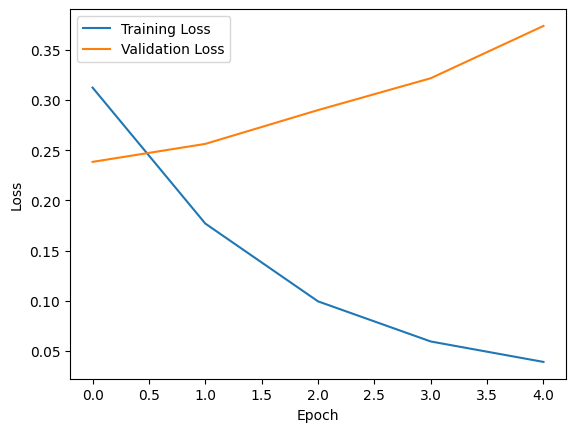

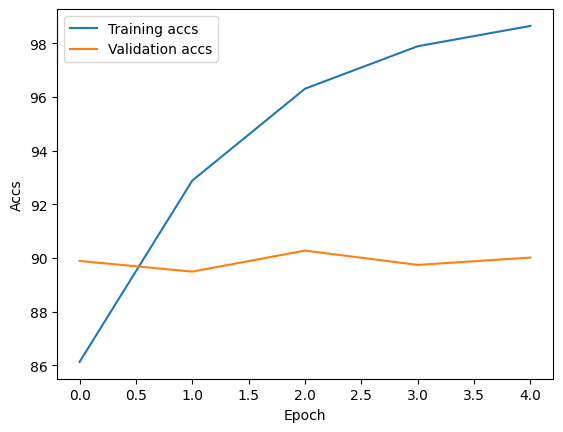

In [ ]:
# Plot the loss values
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accs values
plt.plot(train_accs, label='Training accs')
plt.plot(valid_accs, label='Validation accs')
plt.xlabel('Epoch')
plt.ylabel('Accs')
plt.legend()
plt.show()

In [ ]:
#Put the model in evaluation mode
model.eval()

#Define empty lists to store predictions and actual labels
predictions = []
actual_labels = []

#Turn off gradient computation to speed up inference
with torch.no_grad():
    for data in test_loader:
        # Get the inputs and labels
        input_ids = data[0].to(device)
        input_mask = data[1].to(device)
        input_token = data[2].to(device)
        labels = data[3].to(device)

        # Make predictions
        outputs = model(input_ids, input_mask, input_token)
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions and actual labels
        predictions.extend(predicted.cpu().numpy())
        actual_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(actual_labels, predictions)
precision = precision_score(actual_labels, predictions, average='weighted')
recall = recall_score(actual_labels, predictions, average='weighted')
f1 = f1_score(actual_labels, predictions, average='weighted')

# Print accuracy, precision, recall, and F1-score
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
class_report = classification_report(actual_labels, predictions)
print("Classification Report:")
print(class_report)

Accuracy: 0.9008
Precision: 0.9006
Recall: 0.9008
F1-score: 0.9007
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4605
           1       0.93      0.93      0.93     11587

    accuracy                           0.90     16192
   macro avg       0.88      0.88      0.88     16192
weighted avg       0.90      0.90      0.90     16192



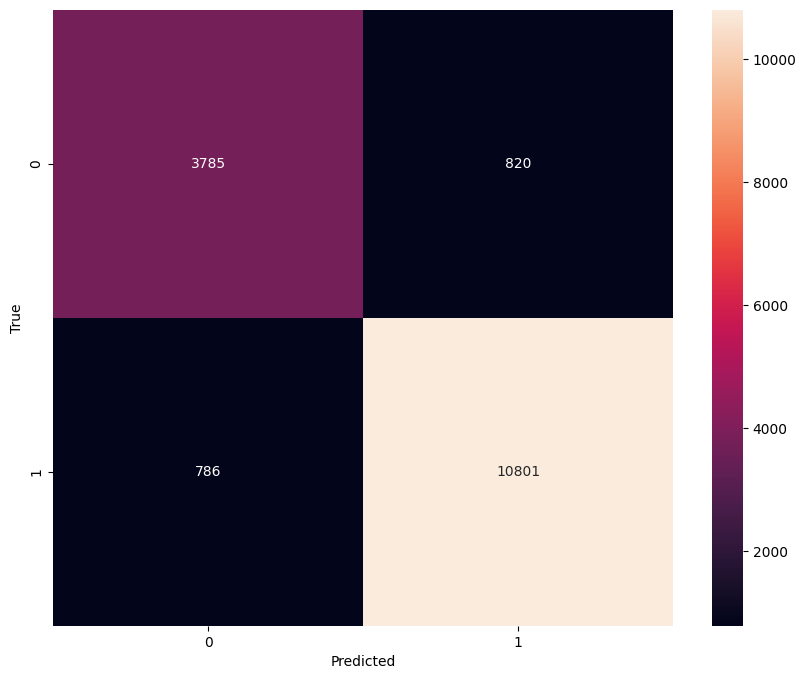

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for data in test_loader:
        input_ids = data[0].to(device)
        input_mask = data[1].to(device)
        input_token = data[2].to(device)
        labels = data[3].to(device)
        outputs = model(input_ids, input_mask, input_token)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()